Price Prediction for Freelancers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('freelancer_earnings_bd.csv')
# df.head()
df

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,1946,Graphic Design,Fiverr,Beginner,USA,Mobile Banking,143,6823,22.54,75.86,4.65,13,Hourly,26.55,133
1946,1947,SEO,Upwork,Intermediate,Middle East,Crypto,164,7942,77.20,72.01,3.29,34,Hourly,24.81,343
1947,1948,SEO,PeoplePerHour,Expert,UK,Bank Transfer,236,9838,24.64,57.37,4.67,38,Fixed,61.52,370
1948,1949,SEO,Freelancer,Intermediate,Europe,Bank Transfer,152,4492,71.07,66.41,4.08,70,Fixed,32.40,32


In [3]:
df.loc[4,'Job_Category']

'Digital Marketing'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Freelancer_ID      1950 non-null   int64  
 1   Job_Category       1950 non-null   object 
 2   Platform           1950 non-null   object 
 3   Experience_Level   1950 non-null   object 
 4   Client_Region      1950 non-null   object 
 5   Payment_Method     1950 non-null   object 
 6   Job_Completed      1950 non-null   int64  
 7   Earnings_USD       1950 non-null   int64  
 8   Hourly_Rate        1950 non-null   float64
 9   Job_Success_Rate   1950 non-null   float64
 10  Client_Rating      1950 non-null   float64
 11  Job_Duration_Days  1950 non-null   int64  
 12  Project_Type       1950 non-null   object 
 13  Rehire_Rate        1950 non-null   float64
 14  Marketing_Spend    1950 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 228.6+ KB


In [5]:
df.describe()

,Freelancer_ID,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Rehire_Rate,Marketing_Spend
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,975.500000,150.864103,5017.566667,52.579774,74.951846,3.995892,44.704615,44.556913,248.517436
std,563.060832,85.480770,2926.279918,26.927584,14.615735,0.575976,26.022998,20.193842,148.084581
min,1.000000,5.000000,51.000000,5.020000,50.160000,3.000000,1.000000,10.000000,0.000000
25%,488.250000,76.000000,2419.000000,30.047500,61.917500,3.510000,22.000000,27.150000,119.000000
50%,975.500000,149.000000,5048.000000,52.285000,75.400000,3.990000,45.000000,43.920000,252.500000
75%,1462.750000,225.000000,7608.250000,75.125000,87.537500,4.500000,67.000000,61.690000,379.000000
max,1950.000000,299.000000,9991.000000,99.830000,99.990000,5.000000,89.000000,79.950000,499.000000


In [6]:
df.isnull().sum()


Freelancer_ID        0
Job_Category         0
Platform             0
Experience_Level     0
Client_Region        0
Payment_Method       0
Job_Completed        0
Earnings_USD         0
Hourly_Rate          0
Job_Success_Rate     0
Client_Rating        0
Job_Duration_Days    0
Project_Type         0
Rehire_Rate          0
Marketing_Spend      0
dtype: int64

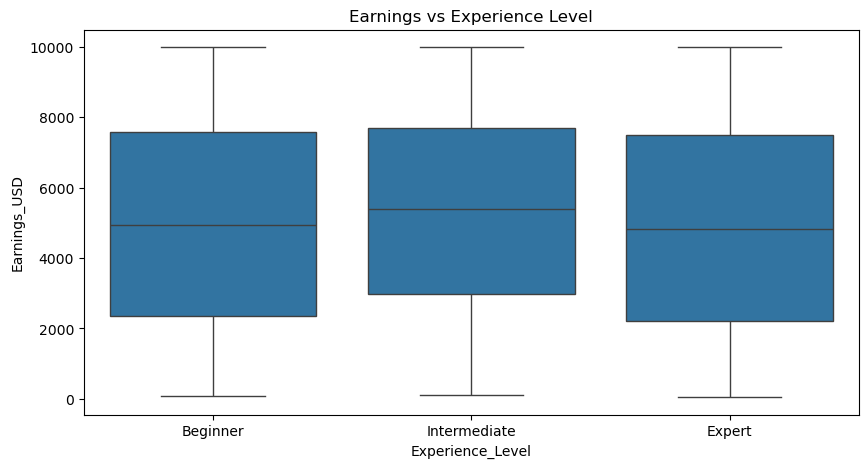

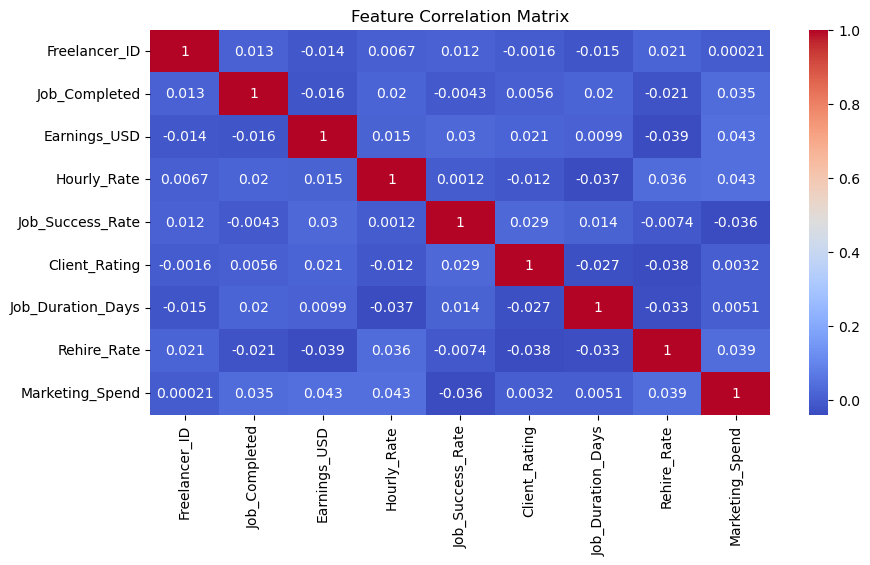

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Experience_Level', y='Earnings_USD', data=df)
plt.title("Earnings vs Experience Level")
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [8]:
df_clean = df.drop(columns=['Freelancer_ID'])

categorical_cols = df_clean.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le


In [9]:
X = df_clean.drop(columns=['Earnings_USD'])
y = df_clean['Earnings_USD']                


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): $2540.90
R² Score: -0.04


In [13]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor MAE: ${mae_knn:.2f}")
print(f"KNN Regressor R²: {r2_knn:.2f}")


KNN Regressor MAE: $2586.07
KNN Regressor R²: -0.13


In [14]:
import gradio as gr
import pandas as pd

# Prediction function
def predict_earning(job_category, platform, experience, region, payment_method,
                    job_completed, hourly_rate, job_success, client_rating,
                    job_duration, project_type, rehire_rate, marketing_spend):

    # Input DataFrame
    input_data = pd.DataFrame([[
        job_category, platform, experience, region, payment_method,
        job_completed, hourly_rate, job_success, client_rating,
        job_duration, project_type, rehire_rate, marketing_spend
    ]], columns=X.columns)  # Make sure X.columns is defined from training

    # Encoding
    for col in label_encoders:
        if col in input_data.columns:
            try:
                input_data[col] = label_encoders[col].transform(input_data[col])
            except ValueError:
                return f"❌ Error: '{input_data[col].values[0]}' is an unknown label for '{col}'"

    # Prediction
    prediction = model.predict(input_data)[0]
    monthly = prediction / 12

    return f"✅ **Estimated Yearly Earnings**: 💰 ${prediction:,.2f}\n📆 **Estimated Monthly Earnings**: 💸 ${monthly:,.2f}"

# Interface
with gr.Blocks(theme=gr.themes.Soft()) as demo:

    # Hide Gradio footer via CSS
    gr.HTML("""
        <style>
            .svelte-1ipelgc {display: none !important;}  /* Hide footer */
        </style>
    """)

    gr.Markdown("<h1 style='text-align:center;'>💼 Price Prediction for Freelancers</h1>")
    gr.Markdown("<p style='text-align:center;'>Predict your expected <b>annual</b> and <b>monthly</b> earnings based on your freelance profile.</p>")

    with gr.Row():
        job_category = gr.Dropdown(["Web Development", "App Development", "Data Entry", "Digital Marketing",
                                    "Customer Support", "Content Writing", "Graphic Design", "SEO"], label="Job Category")
        platform = gr.Dropdown(["Fiverr", "PeoplePerHour", "Upwork", "Toptal", "Freelancer"], label="Platform")
        experience = gr.Dropdown(["Beginner", "Intermediate", "Expert"], label="Experience Level")
        region = gr.Dropdown(["Asia", "Australia", "UK", "Europe", "USA", "Middle East", "Canada"], label="Client Region")
        payment_method = gr.Dropdown(["Mobile Banking", "Crypto", "Bank Transfer", "PayPal"], label="Payment Method")

    with gr.Row():
        job_completed = gr.Slider(0, 500, step=1, label="Jobs Completed")
        hourly_rate = gr.Slider(1, 500, step=1, label="Hourly Rate ($)")
        job_success = gr.Slider(0, 100, step=1, label="Job Success Rate (%)")
        client_rating = gr.Slider(0.0, 5.0, step=0.1, label="Client Rating")
        job_duration = gr.Slider(1, 365, step=1, label="Job Duration (days)")

    with gr.Row():
        project_type = gr.Dropdown(["Fixed", "Hourly"], label="Project Type")
        rehire_rate = gr.Slider(0, 100, step=1, label="Rehire Rate (%)")
        marketing_spend = gr.Slider(0, 10000, step=10, label="Marketing Spend ($)")

    predict_btn = gr.Button("🔮 Predict Earnings")
    result_output = gr.Markdown("")

    predict_btn.click(
        fn=predict_earning,
        inputs=[job_category, platform, experience, region, payment_method,
                job_completed, hourly_rate, job_success, client_rating,
                job_duration, project_type, rehire_rate, marketing_spend],
        outputs=result_output
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
